Identifying the top 10 handsets used by the customers

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pd.options.display.float_format = "{:.2f}".format

tellco_df = pd.read_csv('./Week2_challenge_data_source.csv').rename(columns={
    'Handset Type': 'handset_type', 'Handset Manufacturer': 'handset_manufacturer','Dur. (ms).1': 'Duration(ms)'})

variable_types = {'MSISDN/Number' : 'int64',  
             'Duration(ms)' : 'int64',   
             'Total UL (Bytes)' : 'int64', 
             'Total DL (Bytes)' : 'int64',
             'Social Media DL (Bytes)' : 'int64',
             'Social Media UL (Bytes)' : 'int64',
             'Google DL (Bytes)' : 'int64',
             'Google UL (Bytes)' : 'int64',
             'Email DL (Bytes)' : 'int64',
             'Email UL (Bytes)' : 'int64',
             'Youtube DL (Bytes)' : 'int64',
             'Youtube UL (Bytes)' : 'int64',
             'Netflix DL (Bytes)' : 'int64',
             'Netflix UL (Bytes)' : 'int64',
             'Gaming DL (Bytes)' : 'int64',
             'Gaming UL (Bytes)' : 'int64', }
#              'Other DL (Bytes)' : 'int64',
#              'Other UL (Bytes)' : 'int64'

# tellco_df['MSISDN/Number'].isnull().sum()

for key in variable_types.keys(): tellco_df[key] = tellco_df[key].fillna(tellco_df[key].mean())


tellco_df = tellco_df.astype(variable_types)

In [397]:
variable_total_volume = []
for i in range(4, 15, 2):
    key_ul = list(variable_types.keys())[i]
    key_dl = list(variable_types.keys())[i+1]
    new_col = key_ul.split()[0] + ' Data Volume'
    variable_total_volume.append(new_col)
    tellco_df[new_col] = tellco_df[key_ul] + tellco_df[key_dl]

Top 10 handsets used by the customers

8987 customes' handsets are not specified. Unspecified handsets must filtered out before identifying top 10 handsets used by the customers.  

In [398]:
tellco_df[tellco_df['handset_type'] != 'undefined']['handset_type'].value_counts().head(10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: handset_type, dtype: int64

Identify the top 3 handset manufacturers

In [399]:
top_3_manu = tellco_df['handset_manufacturer'].value_counts().head(3).to_dict()
top_3_manu

{'Apple': 59565, 'Samsung': 40839, 'Huawei': 34423}

Next, identify the top 5 handsets per handset manufacturer

In [400]:
df = tellco_df[tellco_df.handset_manufacturer.isin(top_3_manu.keys())]
df['handset_type'].groupby(df['handset_manufacturer']).apply(lambda x : x.value_counts().head(5))

handset_manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: handset_typ

### Task 1.1

In [402]:
tellco_ds2 = tellco_df.groupby('MSISDN/Number').agg(
    dict( {'Bearer Id': 'count', 
           'Duration(ms)': 'sum',
           'Total UL (Bytes)':'sum', 
           'Total DL (Bytes)': 'sum'},
         **{var:'sum' for var in variable_total_volume} )
    )

tellco_ds2

,Bearer Id,Duration(ms),Total UL (Bytes),Total DL (Bytes),Social Data Volume,Google Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume
MSISDN/Number,,,,,,,,,,
33601001722,1,116720140,36053108,842637466,2232135,4389005,1331362,21624548,27180981,812458661
33601001754,1,181230963,36104459,120755184,2660565,5334863,3307781,12432223,11221763,119750078
33601002511,1,134969374,39306820,556659663,3195623,3443126,3205380,21333570,19353900,538827713
33601007832,1,49878024,20327526,401993172,280294,9678493,2284670,6977321,1942092,391126127
33601008617,2,37104453,94280527,1363130417,2912542,18499616,3305469,41533002,49201724,1314797820
...,...,...,...,...,...,...,...,...,...,...
33789997247,1,140988659,35732243,444575092,498569,5429705,2514097,19851572,8531060,437003292
41882818562,504,72551547092,44366423488,487378285756,1973817361,8248576909,2399880432,24340725905,24253572124,461478029804
3197020000000,1,877385325,37295915,194828056,715224,10438660,1520771,11959905,26592300,178048738


### Task 1.2

In [515]:
tellco_desc= tellco_ds2.drop(['Bearer Id', 'Duration(ms)'], axis=1).copy().rename(
    columns={'Total UL (Bytes)':'Total UL (MB)', 
             'Total DL (Bytes)':'Total DL (MB)'})/1000000

tellco_desc.insert(loc=0, column='Duration(hs)', value=tellco_ds2['Duration(ms)']/1000/60/60)
tellco_desc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Duration(hs),106857.00,40.79,80.41,1.98,19.81,28.54,48.00,20153.21
Total UL (MB),106857.00,57.72,140.16,2.87,36.40,46.79,65.73,44366.42
Total DL (MB),106857.00,638.21,1559.80,8.83,314.83,570.37,807.37,487378.29
Social Data Volume,106857.00,2.57,6.33,0.00,1.21,2.30,3.31,1973.82
Google Data Volume,106857.00,10.96,26.31,0.04,5.94,9.59,13.21,8248.58
Email Data Volume,106857.00,3.17,7.66,0.02,1.67,2.80,3.85,2399.88
Youtube Data Volume,106857.00,31.79,77.35,0.08,18.63,26.80,37.93,24340.73
Netflix Data Volume,106857.00,31.77,77.10,0.18,18.56,26.72,37.98,24253.57
Gaming Data Volume,106857.00,604.08,1479.70,0.31,288.07,542.35,777.31,461478.03


142.66631008700017


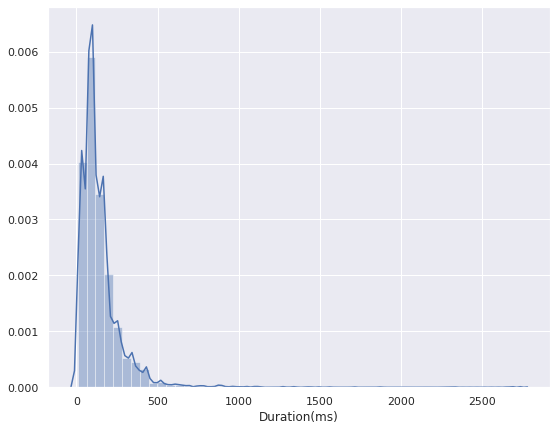

In [502]:
plt.figure(figsize=(9,7))
sns.distplot(tellco_ds2.sample(5000)['Duration(ms)']/1000000)
print((tellco_ds2.sample(5000)['Duration(ms)']/1000000).mean())

Conduct a Graphical Univariate Analysis

618.3268956966001


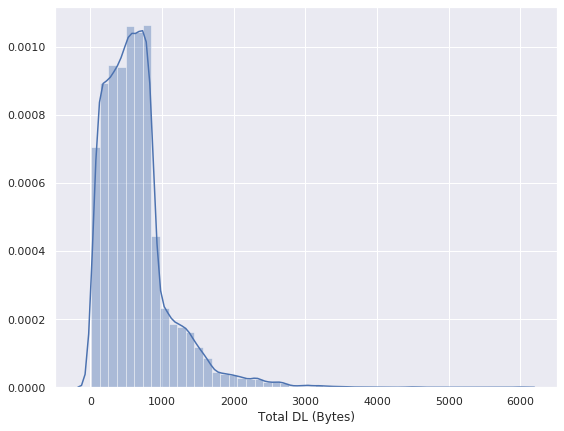

In [443]:
plt.figure(figsize=(9,7))
sns.distplot(tellco_ds2.sample(10000)['Total DL (Bytes)']/1000000)
print((tellco_ds2.sample(5000)['Total DL (Bytes)']/1000000).mean())

58.19704891479996


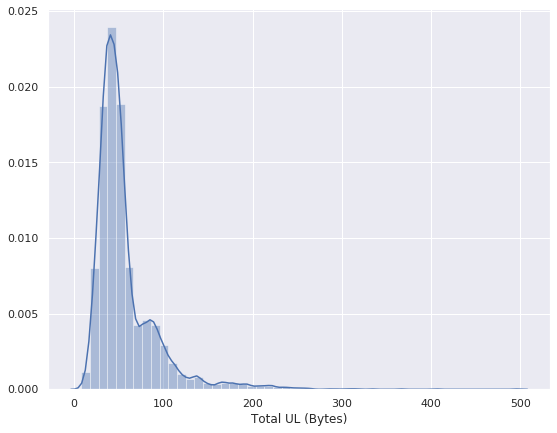

In [457]:
plt.figure(figsize=(9,7))
sns.distplot(tellco_ds2.sample(5000)['Total UL (Bytes)']/1000000)
print((tellco_ds2.sample(5000)['Total UL (Bytes)']/1000000).mean())

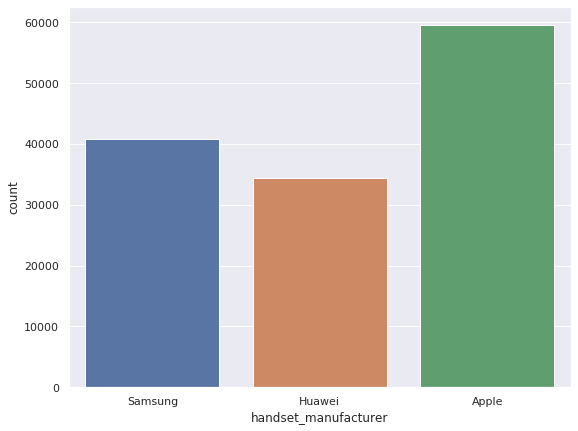

In [458]:
plt.figure(figsize=(9,7))
top_10_manu = tellco_df[tellco_df['handset_manufacturer'] != 'undefined']['handset_manufacturer'].value_counts().index[:3]
ax = sns.countplot(x='handset_manufacturer', data=tellco_df[tellco_df.handset_manufacturer.isin(top_10_manu)])

2.531755149999998


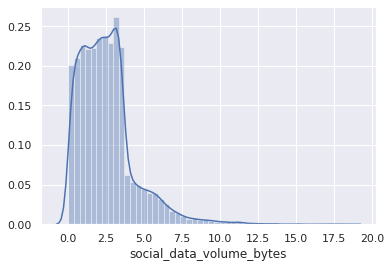

In [295]:
sns.distplot(tellco_ds2.sample(10000)['social_data_volume_bytes']/1000000)
print((tellco_ds2.sample(5000)['social_data_volume_bytes']/1000000).mean())

Bivariate Analysis

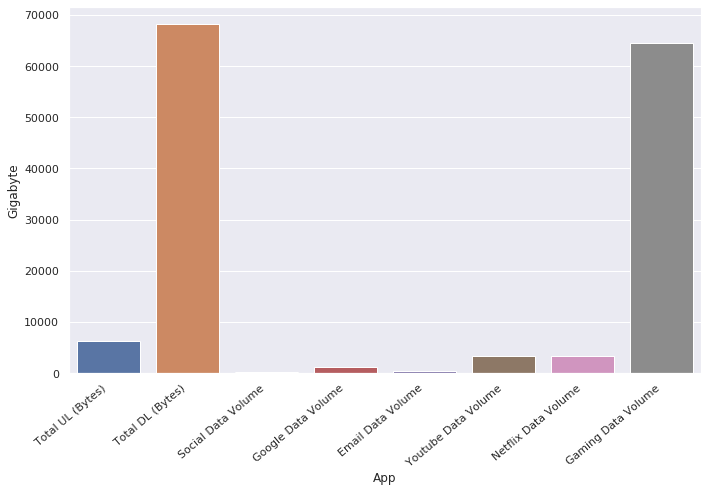

In [462]:
d = (tellco_ds2.sum()/1000000000).reset_index().drop([0, 1]).rename(columns={'index':'App', 0:'Gigabyte'})
plt.figure(figsize=(10,7))
ax=sns.barplot(x='App', y="Gigabyte", data=d)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()